# WHO Life Expectancy EDA

In [1]:
# Importing necessary packages

import pandas as pd # For general data use
import seaborn as sns # For data visualisation
import matplotlib.pyplot as plt # For data visualisation
import numpy as np # For mathematical operations

In [3]:
# Creating dataframe from CSV file

df = pd.read_csv('Life Expectancy Data.csv')

In [4]:
df.head()

Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0         105.8240                 1.32           97       65  27.8  ...   
1          57.9025                10.35           97       94  26.0  ...   
2         201.0765                 1.57           60       35  21.2  ...   
3         222.1965                 5.68           93       74  25.3  ...   
4          57.9510                 2.89           97       89  27.0  ...   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0          97           0.08           11006           78.53   
1          97           0.09           25742           46.44   
2          64           0.13            1076         1183.21   
3          93           0.79            4146            0.75   
4          94           0.08           33995            7.91   

   Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                          4.9                       4.8        7.8   
1                          0.6                       0.5        9.7   
2                         27.1                      28.0        5.0   
3                          5.7                       5.5        7.9   
4                          1.2                       1.1       12.8   

   Economy_status_Developed  Economy_status_Developing  Life_expectancy  
0                         0                          1             76.5  
1                         1                          0             82.8  
2                         0                          1             65.4  
3                         0                          1             67.0  
4                         1                          0             81.7  

[5 rows x 21 columns]

In [5]:
# Checking the amount of null values

df.isnull().sum().sum()

0

In [6]:
# Checking for any duplicates

df.duplicated().sum()

0

In [12]:
# Checking for any incosistencies between developed and developing countries
df.loc[((df.Economy_status_Developed == 1) & (df.Economy_status_Developing == 1)) | ((df.Economy_status_Developed == 0) & (df.Economy_status_Developing == 0))][['Economy_status_Developed', 'Economy_status_Developing']].sum()


Economy_status_Developed     0
Economy_status_Developing    0
dtype: int64

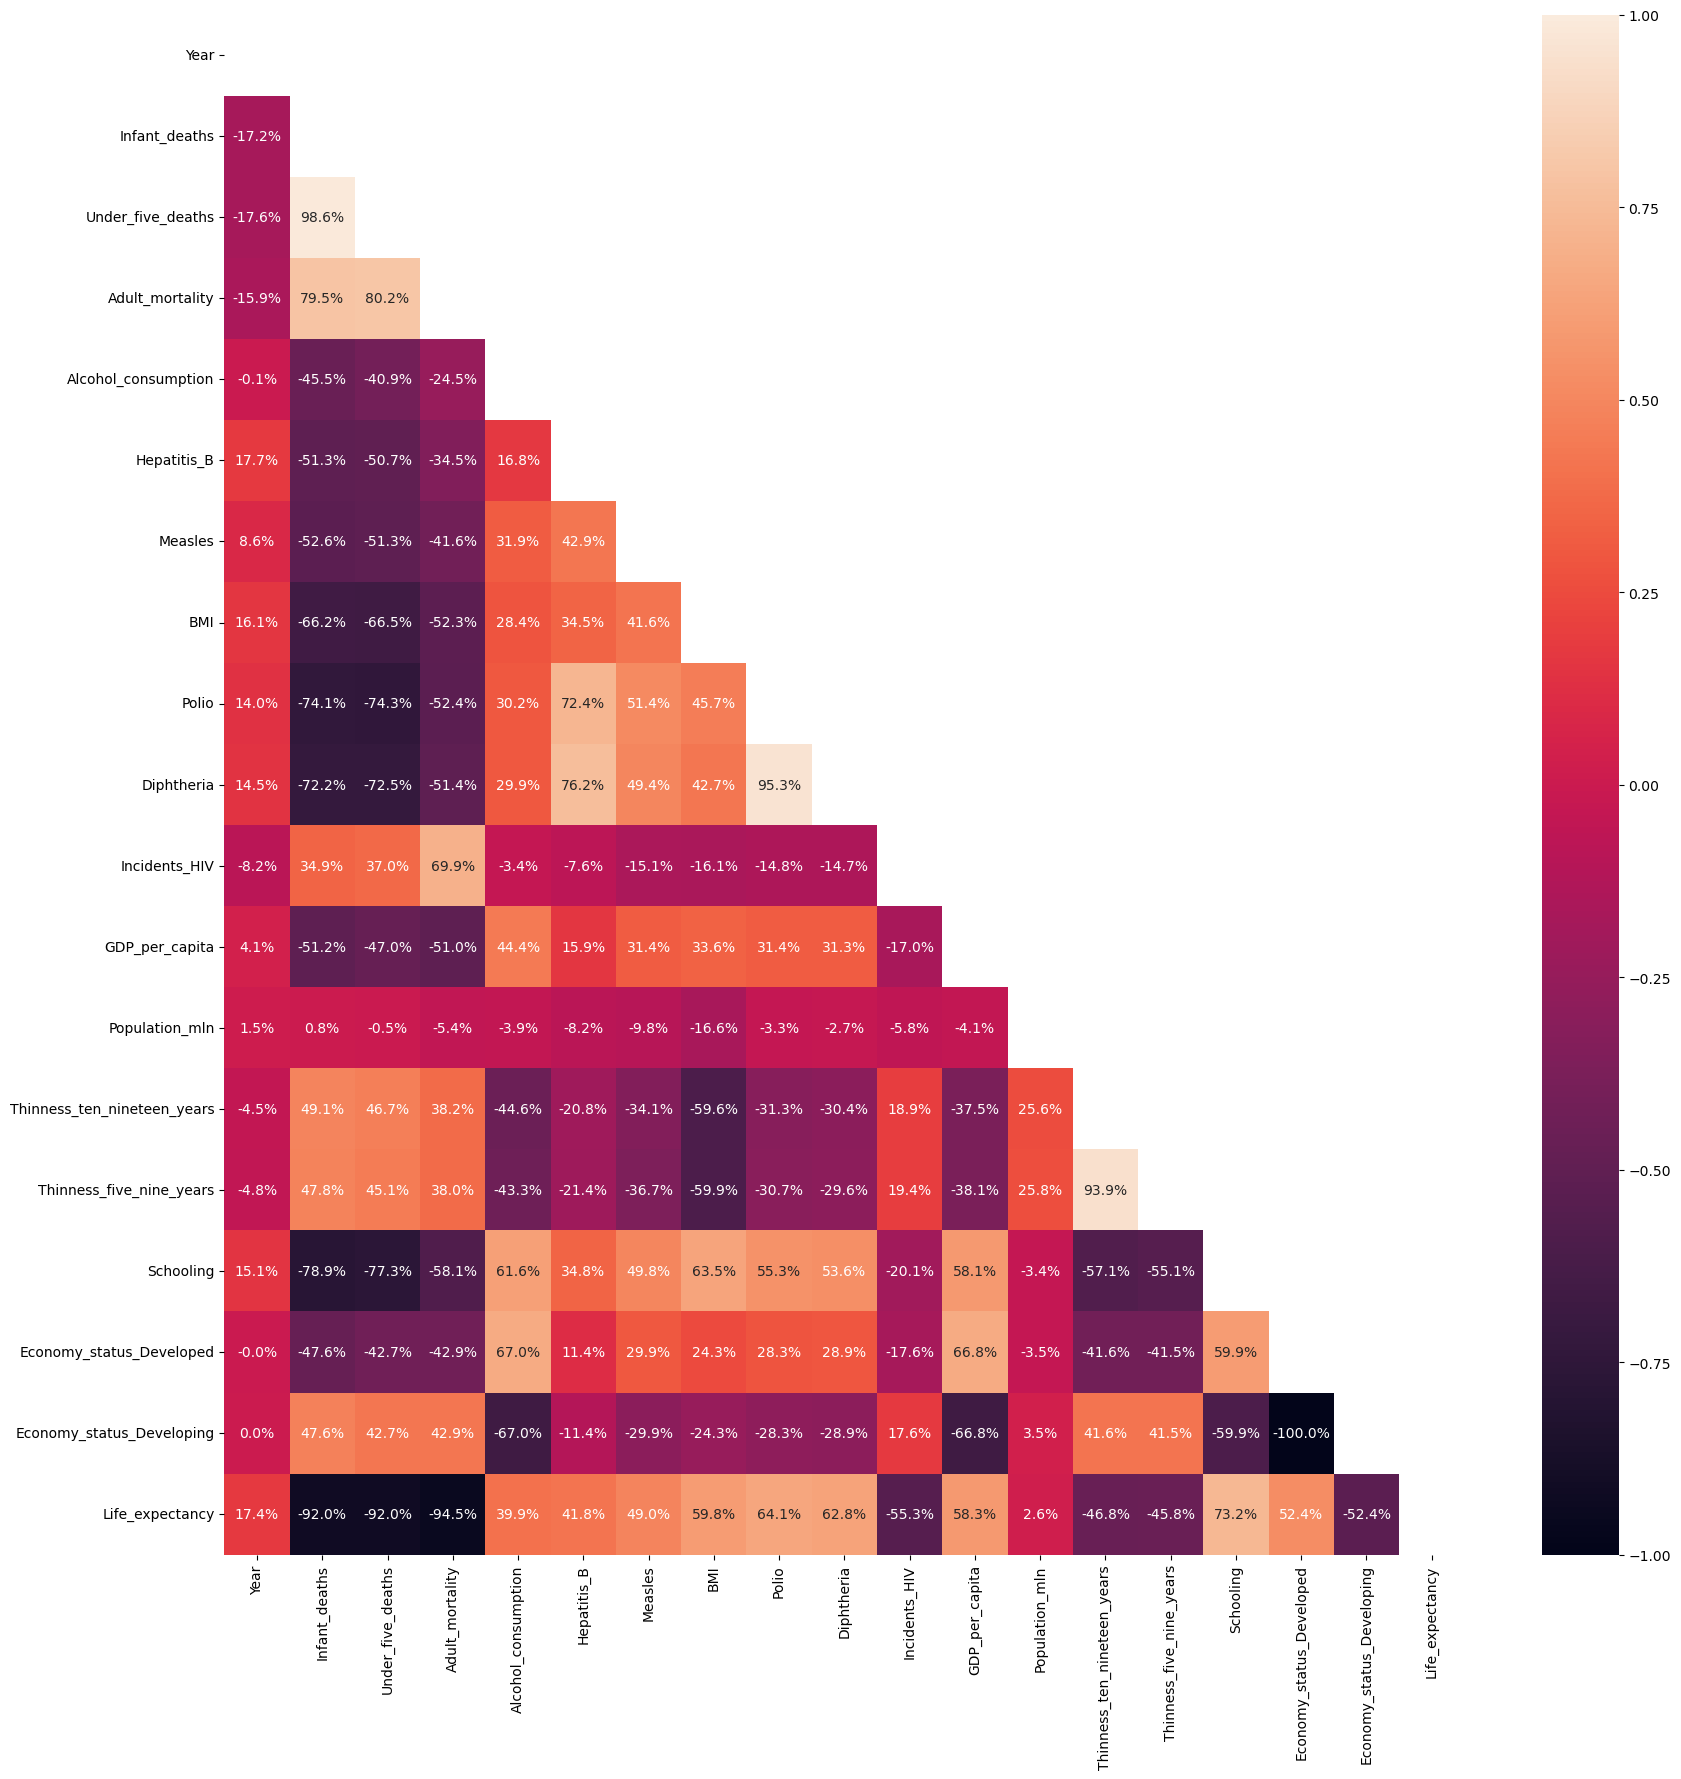

In [7]:
# Checking for any correlations between columns

plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(numeric_only = True),
            annot = True,
           vmin = -1,
           vmax = 1,
           fmt = '.1%',
           mask = np.triu(df.corr(numeric_only = True)))
plt.show()

In [8]:
df.describe()

Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
count  2864.000000    2864.000000        2864.000000      2864.000000   
mean   2007.500000      30.363792          42.938268       192.251775   
std       4.610577      27.538117          44.569974       114.910281   
min    2000.000000       1.800000           2.300000        49.384000   
25%    2003.750000       8.100000           9.675000       106.910250   
50%    2007.500000      19.600000          23.100000       163.841500   
75%    2011.250000      47.350000          66.000000       246.791375   
max    2015.000000     138.100000         224.900000       719.360500   

       Alcohol_consumption  Hepatitis_B      Measles          BMI  \
count          2864.000000  2864.000000  2864.000000  2864.000000   
mean              4.820882    84.292598    77.344972    25.032926   
std               3.981949    15.995511    18.659693     2.193905   
min               0.000000    12.000000    10.000000    19.800000   
25%               1.200000    78.000000    64.000000    23.200000   
50%               4.020000    89.000000    83.000000    25.500000   
75%               7.777500    96.000000    93.000000    26.400000   
max              17.870000    99.000000    99.000000    32.100000   

             Polio   Diphtheria  Incidents_HIV  GDP_per_capita  \
count  2864.000000  2864.000000    2864.000000     2864.000000   
mean     86.499651    86.271648       0.894288    11540.924930   
std      15.080365    15.534225       2.381389    16934.788931   
min       8.000000    16.000000       0.010000      148.000000   
25%      81.000000    81.000000       0.080000     1415.750000   
50%      93.000000    93.000000       0.150000     4217.000000   
75%      97.000000    97.000000       0.460000    12557.000000   
max      99.000000    99.000000      21.680000   112418.000000   

       Population_mln  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
count     2864.000000                  2864.000000               2864.000000   
mean        36.675915                     4.865852                  4.899825   
std        136.485867                     4.438234                  4.525217   
min          0.080000                     0.100000                  0.100000   
25%          2.097500                     1.600000                  1.600000   
50%          7.850000                     3.300000                  3.400000   
75%         23.687500                     7.200000                  7.300000   
max       1379.860000                    27.700000                 28.600000   

         Schooling  Economy_status_Developed  Economy_status_Developing  \
count  2864.000000               2864.000000                2864.000000   
mean      7.632123                  0.206704                   0.793296   
std       3.171556                  0.405012                   0.405012   
min       1.100000                  0.000000                   0.000000   
25%       5.100000                  0.000000                   1.000000   
50%       7.800000                  0.000000                   1.000000   
75%      10.300000                  0.000000                   1.000000   
max      14.100000                  1.000000                   1.000000   

       Life_expectancy  
count      2864.000000  
mean         68.856075  
std           9.405608  
min          39.400000  
25%          62.700000  
50%          71.400000  
75%          75.400000  
max          83.800000

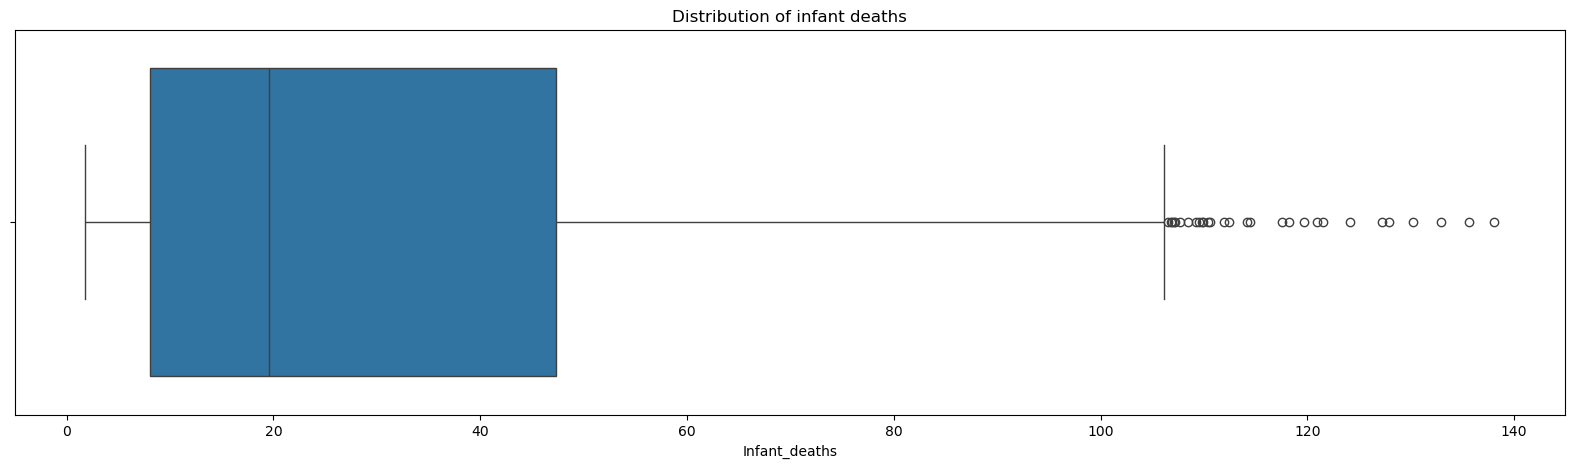

In [17]:
# Checking the Under_five_deaths distribution

plt.figure(figsize = (20, 5))
sns.boxplot(data = df['Infant_deaths'],
            orient = 'h')
plt.title('Distribution of infant deaths')
plt.show()

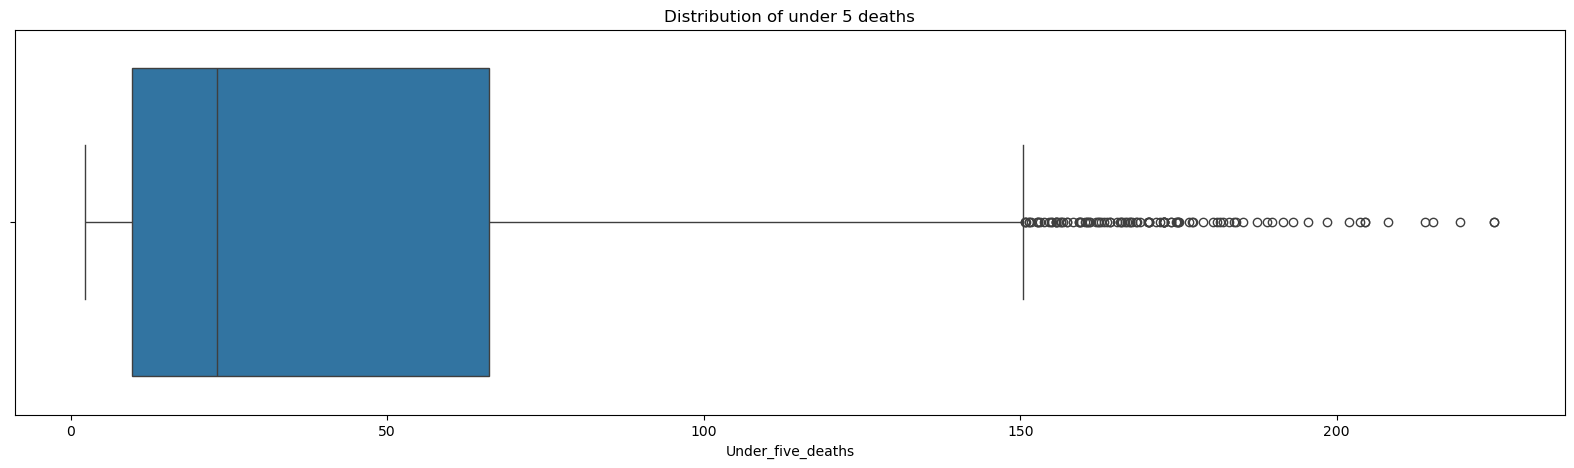

In [15]:
# Checking the Under_five_deaths distribution

plt.figure(figsize = (20, 5))
sns.boxplot(data = df['Under_five_deaths'],
            orient = 'h')
plt.title('Distribution of under 5 deaths')
plt.show()

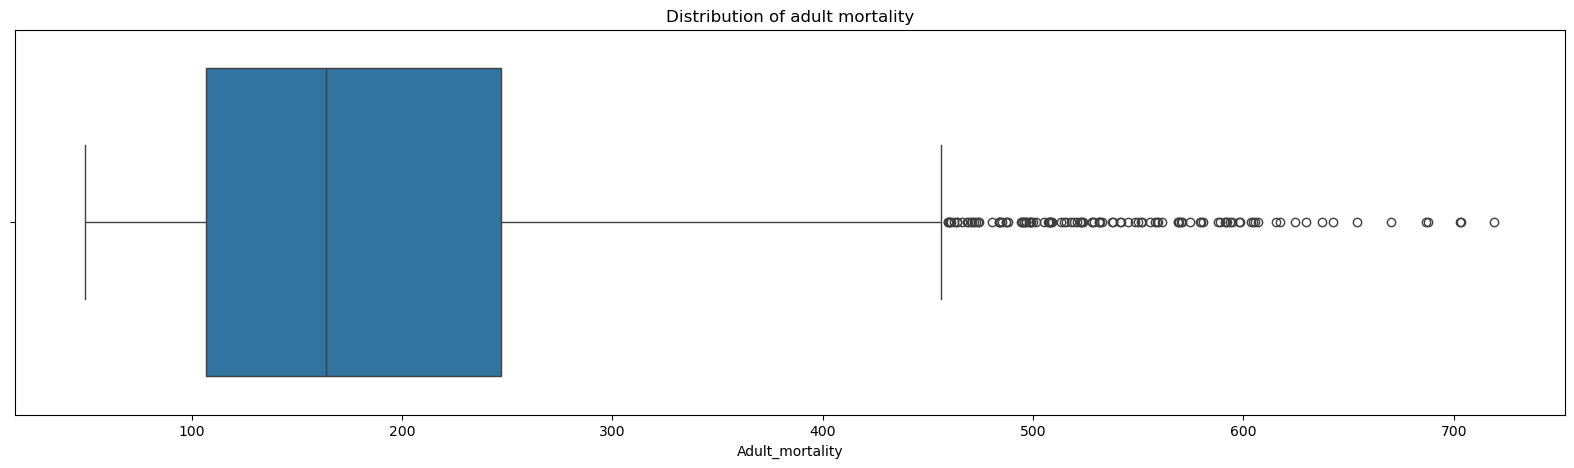

In [18]:
# Checking the Adult_mortality distribution

plt.figure(figsize = (20, 5))
sns.boxplot(data = df['Adult_mortality'],
            orient = 'h')
plt.title('Distribution of adult mortality')
plt.show()

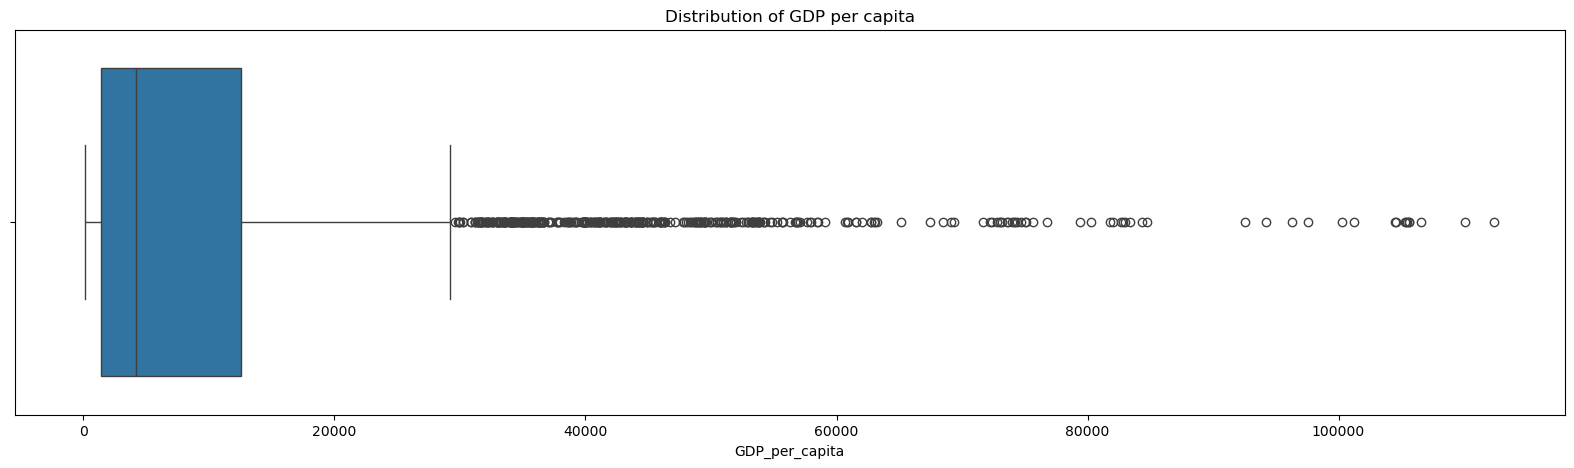

In [22]:
# Checking the GDP_per_capita distribution

plt.figure(figsize = (20, 5))
sns.boxplot(data = df['GDP_per_capita'],
            orient = 'h')
plt.title('Distribution of GDP per capita')
plt.show()

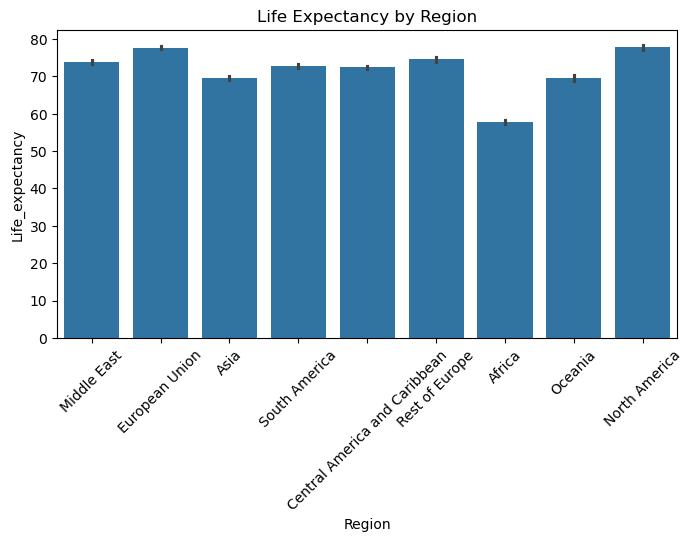

In [23]:
# Plotting the life expectancy of each region

plt.figure(figsize=(8, 4))
sns.barplot(data=df, 
            x='Region', 
            y='Life_expectancy')

plt.tick_params(axis='x', labelrotation=45)
plt.title('Life Expectancy by Region')
plt.show()

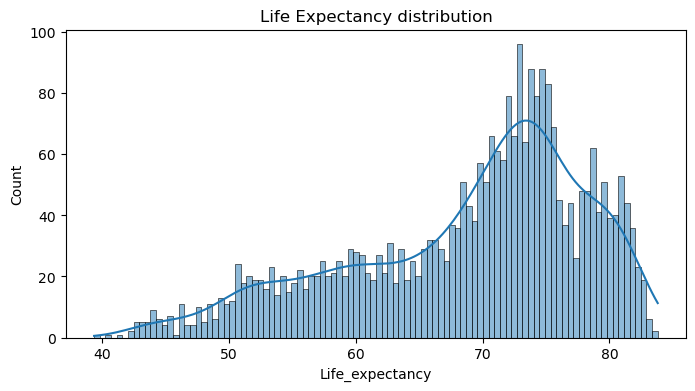

In [25]:
# Checking distribution of Life_expectancy

plt.figure(figsize=(8, 4))
sns.histplot(data=df, 
             x='Life_expectancy', 
             bins=100, 
             kde=True)
plt.title('Life Expectancy distribution')
plt.show()

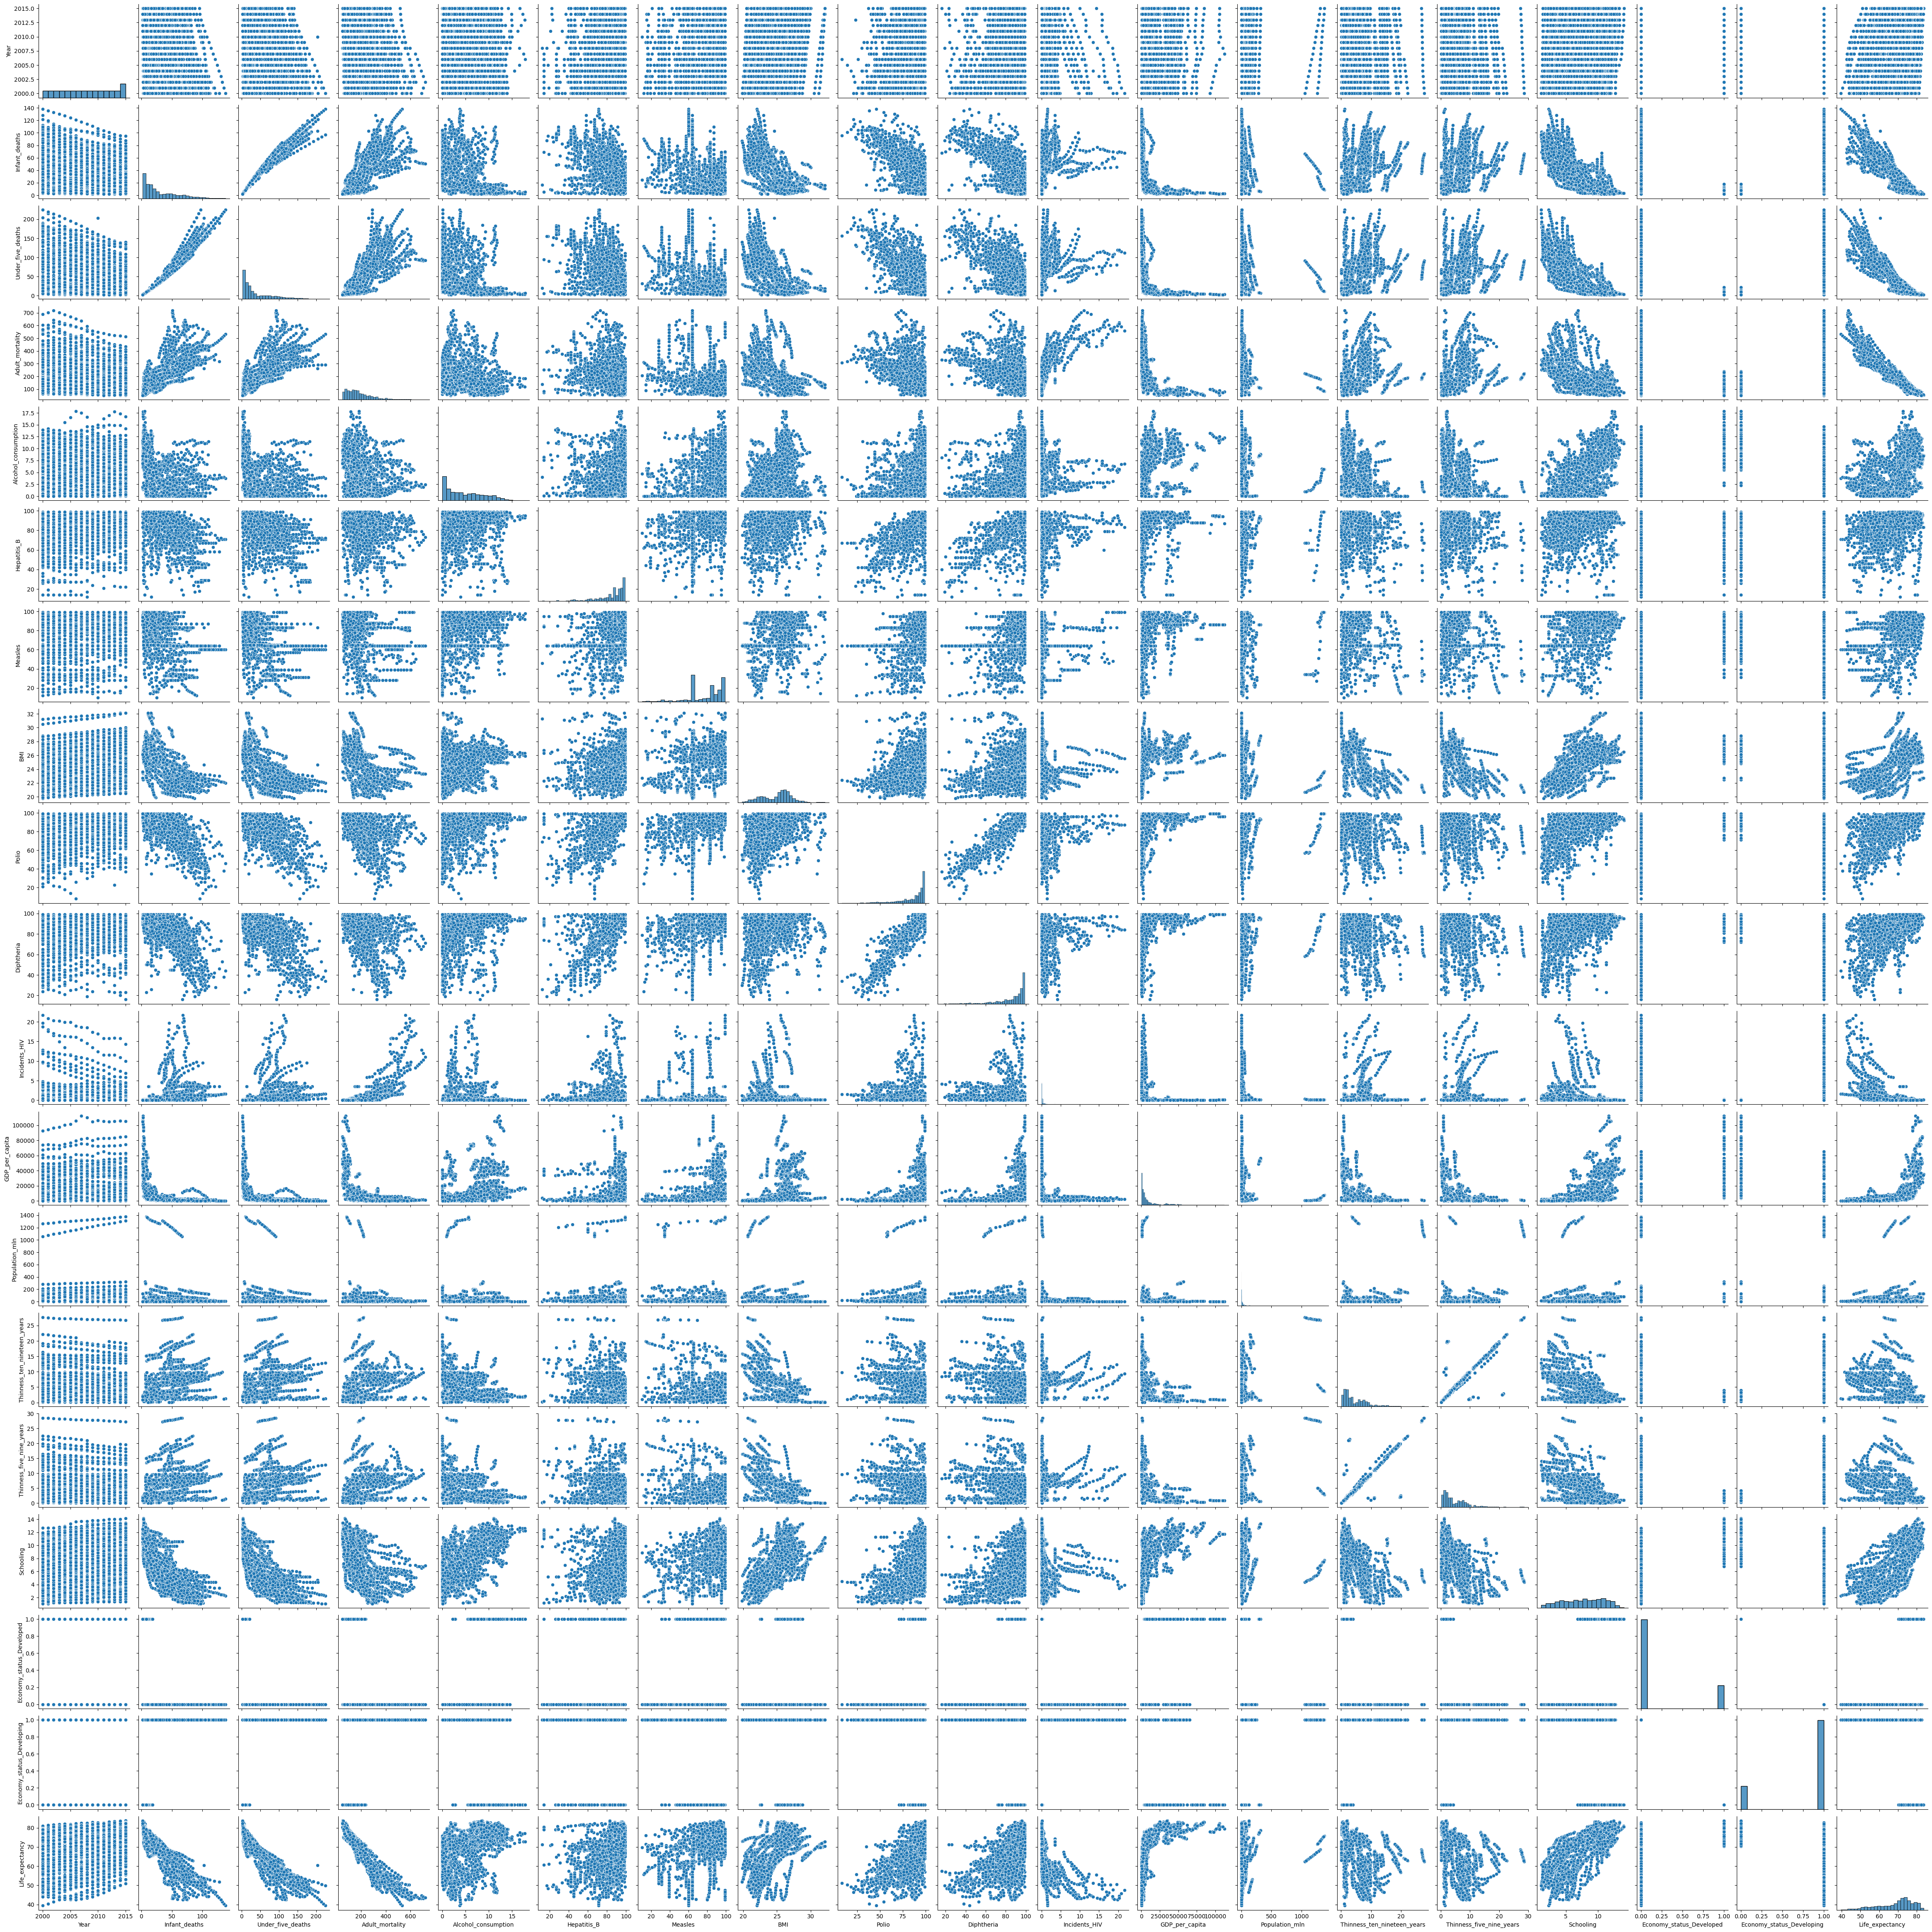

In [18]:
sns.pairplot(df)
plt.show()